In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# importing file

train=pd.read_csv('train.csv')

In [3]:
#data overview

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# nr rows

train.index

RangeIndex(start=0, stop=1460, step=1)

In [5]:
#columns

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#nr columns

train.columns.value_counts()

Street         1
HeatingQC      1
Exterior2nd    1
Condition1     1
Heating        1
              ..
Exterior1st    1
SalePrice      1
PoolArea       1
LandContour    1
Electrical     1
Length: 81, dtype: int64

In [7]:
#check nulls

null_columns=train.isnull().sum()
null_columns.sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
#drop nulls

drop_cols = list(null_columns[null_columns > 1000].index)
train = train.drop(drop_cols, axis=1)

In [9]:
#confirm

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [10]:
# the focus of the analysis is to limit the effect of the neighborhood in Salesprice
# it is like that in order to evaluate mostly the weight of the characteristics of the house per se on the price
#ideally three clusters would be done for the regression, looking at the average price cluster, less expensive cluster and more expensive cluster
#the model will be the average price, eliminating the outliers since it represents better the population than the others

In [11]:
#select columns not relevant for analysis: area, years of built/remod, number of rooms, neighborhood and other categorical data were kept

notrelevant=['MSSubClass', 'MSZoning', 'LotFrontage','LotConfig','Condition1','Condition2', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BldgType', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2', 'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF','Heating', 'HeatingQC','SaleType','CentralAir','BsmtFullBath', 'BsmtHalfBath','Electrical','LowQualFinSF','Functional','FireplaceQu','GarageType','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']

In [12]:
#drop columns and check if successful

train = train.drop(notrelevant, axis=1)
train.columns

Index(['Id', 'LotArea', 'Street', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond',
       'Foundation', 'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:
#copy for analysis and check types

house=train.copy()

house.dtypes

Id                 int64
LotArea            int64
Street            object
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
ExterCond         object
Foundation        object
BsmtCond          object
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageArea         int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SaleCondition     object
SalePrice          int64
dtype: object

In [14]:
#new colums looking at the years taken between build/remod until being sold

house=house.assign(time_sold_from_contruction = house['YrSold']-house['YearBuilt'])

house=house.assign(time_sold_from_renovation = house['YrSold']-house['YearRemodAdd'])

#confirm

house.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation
0,1,8450,Pave,CollgCr,2Story,7,5,2003,2003,Gable,...,2003.0,548,0,0,2,2008,Normal,208500,5,5
1,2,9600,Pave,Veenker,1Story,6,8,1976,1976,Gable,...,1976.0,460,0,0,5,2007,Normal,181500,31,31
2,3,11250,Pave,CollgCr,2Story,7,5,2001,2002,Gable,...,2001.0,608,0,0,9,2008,Normal,223500,7,6
3,4,9550,Pave,Crawfor,2Story,7,5,1915,1970,Gable,...,1998.0,642,0,0,2,2006,Abnorml,140000,91,36
4,5,14260,Pave,NoRidge,2Story,8,5,2000,2000,Gable,...,2000.0,836,0,0,12,2008,Normal,250000,8,8


In [15]:
#putting number of bathrooms all together

house=house.assign(total_bathrooms_above_gl = house['FullBath']+house['HalfBath'])


In [16]:
#drop remaining bathrooms

bathdrop=['FullBath', 'HalfBath']
house = house.drop(bathdrop, axis=1)

In [17]:
#check correlations,first overview to compare

house.corr()['SalePrice']


Id                           -0.021917
LotArea                       0.263843
OverallQual                   0.790982
OverallCond                  -0.077856
YearBuilt                     0.522897
YearRemodAdd                  0.507101
TotalBsmtSF                   0.613581
1stFlrSF                      0.605852
2ndFlrSF                      0.319334
GrLivArea                     0.708624
BedroomAbvGr                  0.168213
KitchenAbvGr                 -0.135907
TotRmsAbvGrd                  0.533723
Fireplaces                    0.466929
GarageYrBlt                   0.486362
GarageArea                    0.623431
PoolArea                      0.092404
MiscVal                      -0.021190
MoSold                        0.046432
YrSold                       -0.028923
SalePrice                     1.000000
time_sold_from_contruction   -0.523350
time_sold_from_renovation    -0.509079
total_bathrooms_above_gl      0.568267
Name: SalePrice, dtype: float64

In [18]:
#What makes sense to analyse?
#OverallQual
#TotalBsmtSF
#GrLivArea  
#TotRmsAbvGrd 
#LotArea - included due to area logic
#GarageArea 
#time_sold_from_contruction 
#time_sold_from_renovation
#total_bathrooms_above_gl 

#1stFlrSF and 2ndFlrSF connected to GrLivArea
#year build and remo also connected to the last columns added

In [19]:
#check price mean as reference

meanp=house['SalePrice'].mean()
meanp

180921.19589041095

In [20]:
#check variance

varp=house['SalePrice'].var(ddof=1)
varp

6311111264.297448

In [21]:
#check standard variation

stvarp=house['SalePrice'].std(ddof=1)
stvarp

79442.50288288662

In [22]:
#check correlation

house.corr()['SalePrice']

Id                           -0.021917
LotArea                       0.263843
OverallQual                   0.790982
OverallCond                  -0.077856
YearBuilt                     0.522897
YearRemodAdd                  0.507101
TotalBsmtSF                   0.613581
1stFlrSF                      0.605852
2ndFlrSF                      0.319334
GrLivArea                     0.708624
BedroomAbvGr                  0.168213
KitchenAbvGr                 -0.135907
TotRmsAbvGrd                  0.533723
Fireplaces                    0.466929
GarageYrBlt                   0.486362
GarageArea                    0.623431
PoolArea                      0.092404
MiscVal                      -0.021190
MoSold                        0.046432
YrSold                       -0.028923
SalePrice                     1.000000
time_sold_from_contruction   -0.523350
time_sold_from_renovation    -0.509079
total_bathrooms_above_gl      0.568267
Name: SalePrice, dtype: float64

In [23]:
#grouping by neighbourhood and price to check the most expensive neighborhood 
#to correborate (or not) that neighborhood influences dispersion

hood = house.groupby(['Neighborhood'], as_index = False).agg({ 'SalePrice': 'mean'})

hood=hood.sort_values(by='SalePrice', ascending = False)

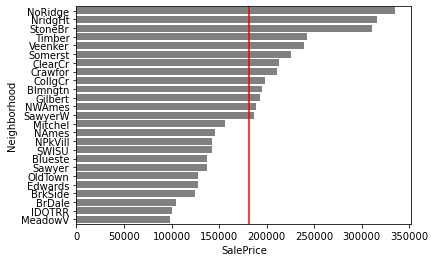

In [24]:
#plot to get some visuals comparing to mean

ax = sns.barplot(data=hood, 
            x="SalePrice",
            y="Neighborhood",
            color='grey');

ax.axvline (meanp, color="red")

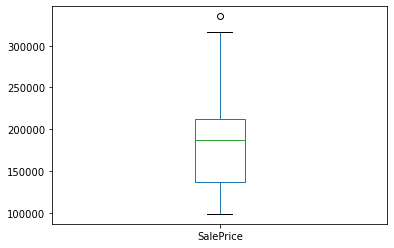

In [25]:
#check dispersion with box plot

hood.boxplot(column='SalePrice', grid=False)

In [26]:
#check for outliers to start clustering hood influence

descriptive=hood.describe().transpose()

descriptive

,count,mean,std,min,25%,50%,75%,max
SalePrice,25.0,183964.8533,66725.196972,98576.470588,136793.135135,186555.79661,212565.428571,335295.317073


In [27]:
#outliers neighborhood

descriptive['IQR'] = descriptive['75%'] - descriptive['25%']
print(descriptive['IQR'])

outlier25=descriptive['25%']-(1.5*descriptive['IQR'])

outlier75=descriptive['75%']+(1.5*descriptive['IQR'])

print('outlier25', outlier25)
print('outlier75', outlier75)

SalePrice    75772.293436
Name: IQR, dtype: float64
outlier25 SalePrice    23134.694981
dtype: float64
outlier75 SalePrice    326223.868726
dtype: float64


In [28]:
## **Analysis 1**: taking off the very expensive and cheap outliers looking at neighborhoods

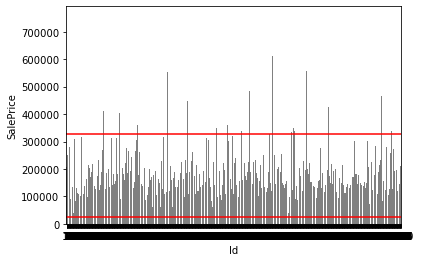

In [29]:
#visualing,modeling first the sale price in between the red lines

ax = sns.barplot(data=house, 
            x="Id",
            y="SalePrice",
            color='grey');

ax.axhline (23134.694981, color="red");
ax.axhline (326223.868726, color="red");

In [30]:
#removed outliers clustering

outhood=house.copy()

outhood.drop(outhood[(outhood['SalePrice'] <= 23134.694981) | (outhood['SalePrice'] >= 326223.868726)].index, inplace=True)




In [31]:
#checking if we can keep only normal conditions

outhood['SaleCondition'].value_counts()

Normal     1160
Abnorml      99
Partial      93
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [32]:
#only normal conditions since thoese are the ones representing better the population

outhood=outhood.loc[outhood['SaleCondition']=='Normal']

#check correlation again

outhood.corr()['SalePrice']

Id                           -0.028990
LotArea                       0.260650
OverallQual                   0.781444
OverallCond                  -0.039618
YearBuilt                     0.537354
YearRemodAdd                  0.511322
TotalBsmtSF                   0.580170
1stFlrSF                      0.553296
2ndFlrSF                      0.332822
GrLivArea                     0.699776
BedroomAbvGr                  0.215111
KitchenAbvGr                 -0.158093
TotRmsAbvGrd                  0.483985
Fireplaces                    0.466681
GarageYrBlt                   0.474897
GarageArea                    0.595366
PoolArea                      0.027772
MiscVal                      -0.008438
MoSold                        0.034260
YrSold                       -0.004459
SalePrice                     1.000000
time_sold_from_contruction   -0.537620
time_sold_from_renovation    -0.513257
total_bathrooms_above_gl      0.582786
Name: SalePrice, dtype: float64

In [33]:
#check for correlations between years from built/revon until sold on this cluster

outhood1=sm.add_constant(outhood)
y1=outhood1["SalePrice"]
X1=outhood1[["const", "time_sold_from_contruction","time_sold_from_renovation"]]

reg1=sm.OLS(y1, X1).fit()

reg1.summary()

#not strong adjusted R both variables together only

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     327.4
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          2.05e-113
Time:                        16:44:41   Log-Likelihood:                -14056.
No. Observations:                1160   AIC:                         2.812e+04
Df Residuals:                    1157   BIC:                         2.813e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.169e+05   2319.206     93.540      0.000    2.12e+05    2.21e+05
time_sold_from_contruction  -696.8784     52.297    -13.325      0.000    -799.486    -594.271
time_sold_from_renovation   -867.6131     75.752    -11.453      0.000   -1016.240    -718.986
==============================================================================
Omnibus:                      119.327   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.732
Skew:                           0.811   Prob(JB):                     1.25e-35
Kurtosis:                       3.835   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#check for regression time sold from construction
outhood2=outhood.copy()

outhood2 = sm.add_constant(outhood2)
y2 = outhood2["SalePrice"]
X2 = outhood2[["const", "time_sold_from_contruction"]]

reg2 = sm.OLS(y2, X2).fit()

reg2.summary()

#even smaller R, per se not significant


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     470.8
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           7.22e-88
Time:                        16:44:41   Log-Likelihood:                -14119.
No. Observations:                1160   AIC:                         2.824e+04
Df Residuals:                    1158   BIC:                         2.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.081e+05   2306.480     90.221      0.000    2.04e+05    2.13e+05
time_sold_from_contruction -1014.5733     46.760    -21.697      0.000   -1106.318    -922.829
==============================================================================
Omnibus:                      168.947   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.346
Skew:                           0.968   Prob(JB):                     1.97e-59
Kurtosis:                       4.359   Cond. No.                         82.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

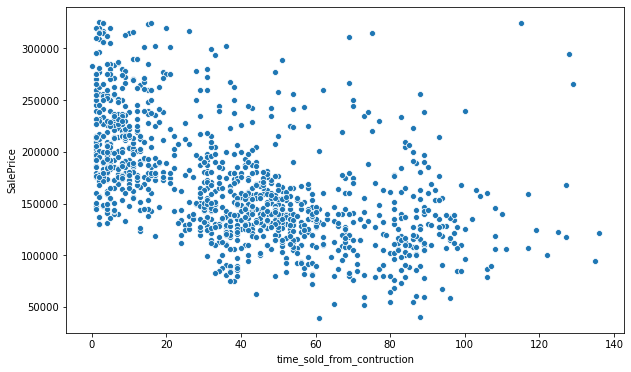

In [35]:
#plot time from construction to being sold for visualization, might still be used in model

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood2,
                x="time_sold_from_contruction",
                y="SalePrice",
                ax=ax);

#trend visible

In [36]:
#check for regression time sold from year renovated

outhood3=outhood.copy()

outhood3 = sm.add_constant(outhood3)
y3 = outhood3["SalePrice"]
X3 = outhood3[["const", "time_sold_from_renovation"]]

reg3 = sm.OLS(y3, X3).fit()

reg3.summary()

#no strong connection either, but we can observe a trend

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     414.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           5.95e-79
Time:                        16:44:42   Log-Likelihood:                -14139.
No. Observations:                1160   AIC:                         2.828e+04
Df Residuals:                    1158   BIC:                         2.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.025e+05   2203.432     91.925      0.000    1.98e+05    2.07e+05
time_sold_from_renovation -1403.0131     68.941    -20.351      0.000   -1538.277   -1267.749
==============================================================================
Omnibus:                       41.452   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.130
Skew:                           0.462   Prob(JB):                     1.59e-10
Kurtosis:                       3.286   Cond. No.                         50.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

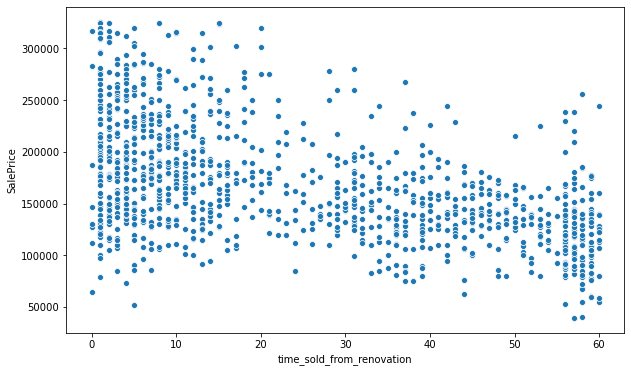

In [37]:
#plot renovation until sold Sale price

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood3,
                x="time_sold_from_renovation",
                y="SalePrice",
                ax=ax);

#no strong connection but a trend is visible

In [38]:
#check for regression area of lot and area above ground

outhood4=outhood.copy()

outhood4 = sm.add_constant(outhood4)
y4 = outhood4["SalePrice"]
X4 = outhood4[["const","LotArea","GrLivArea"]]

reg4 = sm.OLS(y4, X4).fit()

reg4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     587.5
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          7.97e-177
Time:                        16:44:42   Log-Likelihood:                -13910.
No. Observations:                1160   AIC:                         2.783e+04
Df Residuals:                    1157   BIC:                         2.784e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.042e+04   3891.774     10.386      0.000    3.28e+04    4.81e+04
LotArea        0.7732      0.134      5.752      0.000       0.509       1.037
GrLivArea     81.9689      2.571     31.884      0.000      76.925      87.013
==============================================================================
Omnibus:                       38.719   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.809
Skew:                           0.191   Prob(JB):                     4.67e-18
Kurtosis:                       4.227   Cond. No.                     4.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

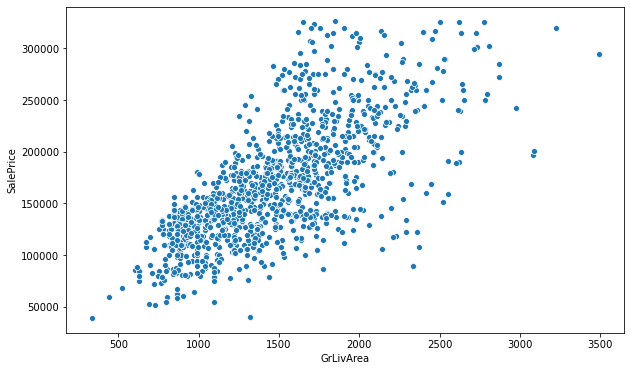

In [39]:
#scatter plot above ground living area

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood4,
                x="GrLivArea",
                y="SalePrice",
                ax=ax);

#suggests correlation

(0.0, 30000.0)

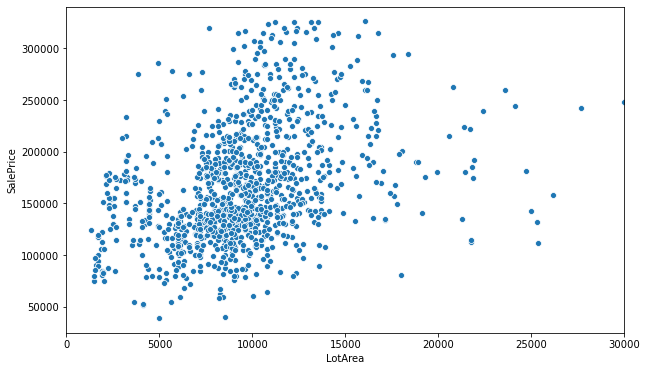

In [40]:
#scatter plot lot area

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood4,
                x="LotArea",
                y="SalePrice",
                ax=ax);

ax.set_xlim(0,30000)

#corrolation unclear, to check again in the end of regression modelling

In [41]:
#considerable R, >0.5, supports the model
#checking if other areas improve the model. adding basement area

outhood5=outhood.copy()

outhood5 = sm.add_constant(outhood5)
y5 = outhood5["SalePrice"]
X5 = outhood5[["const","LotArea","GrLivArea","TotalBsmtSF"]]

reg5 = sm.OLS(y5, X5).fit()

reg5.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     681.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          5.64e-255
Time:                        16:44:43   Log-Likelihood:                -13726.
No. Observations:                1160   AIC:                         2.746e+04
Df Residuals:                    1156   BIC:                         2.748e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5598.0023   3721.185      1.504      0.133   -1703.031    1.29e+04
LotArea         0.4347      0.116      3.750      0.000       0.207       0.662
GrLivArea      68.4594      2.289     29.908      0.000      63.968      72.950
TotalBsmtSF    57.9194      2.788     20.775      0.000      52.449      63.389
==============================================================================
Omnibus:                       44.219   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.134
Skew:                          -0.263   Prob(JB):                     5.38e-19
Kurtosis:                       4.210   Cond. No.                     5.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0.0, 3000.0)

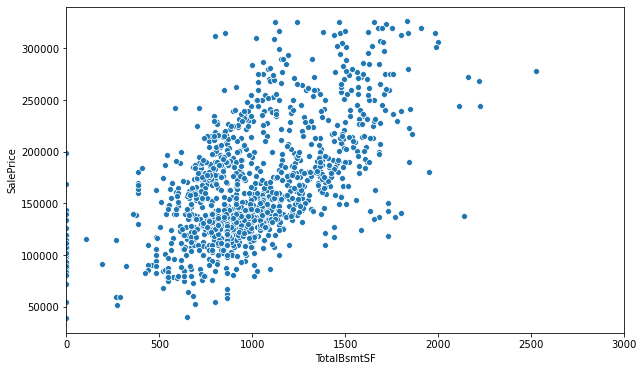

In [42]:
#checking basement scatter plot

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood5,
                x="TotalBsmtSF",
                y="SalePrice",
                ax=ax);

ax.set_xlim(0,3000)

#they seem positively correlated


In [43]:
#R is imrpoving. area influences price as predicted
#checking if other areas improve the model. adding garage area

outhood6=outhood.copy()

outhood6 = sm.add_constant(outhood6)
y6 = outhood6["SalePrice"]
X6 = outhood6[["const","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

reg6 = sm.OLS(y6, X6).fit()

reg6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     662.0
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          5.22e-297
Time:                        16:44:44   Log-Likelihood:                -13625.
No. Observations:                1160   AIC:                         2.726e+04
Df Residuals:                    1155   BIC:                         2.729e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2930.3696   3461.727     -0.847      0.397   -9722.348    3861.609
LotArea         0.3588      0.106      3.370      0.001       0.150       0.568
GrLivArea      58.7777      2.199     26.726      0.000      54.463      63.093
TotalBsmtSF    45.8768      2.684     17.094      0.000      40.611      51.142
GarageArea     78.8726      5.331     14.794      0.000      68.413      89.333
==============================================================================
Omnibus:                       72.414   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.710
Skew:                          -0.357   Prob(JB):                     5.17e-38
Kurtosis:                       4.744   Cond. No.                     5.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

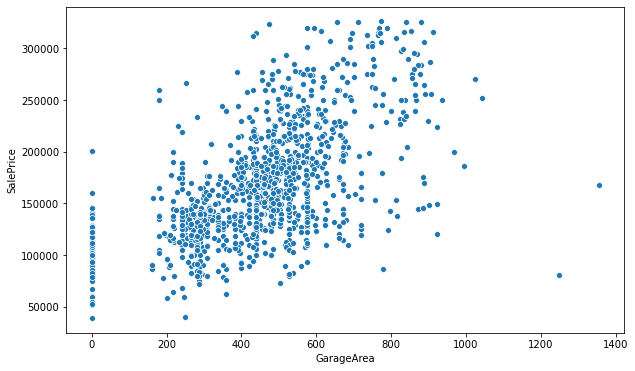

In [44]:
#checking garage scatter plot

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=outhood6,
                x="GarageArea",
                y="SalePrice",
                ax=ax);

#also seems positively correlated on the plot

In [45]:
# checking the overall quality score influence

outhood7=outhood.copy()

outhood7 = sm.add_constant(outhood7)
y7 = outhood7["SalePrice"]
X7 = outhood7[["const", "OverallQual"]]

reg7 = sm.OLS(y7, X7).fit()

reg7.summary()

#might be significant. adding it to potential model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1816.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          1.91e-239
Time:                        16:44:44   Log-Likelihood:                -13769.
No. Observations:                1160   AIC:                         2.754e+04
Df Residuals:                    1158   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.89e+04   4957.401     -7.846      0.000   -4.86e+04   -2.92e+04
OverallQual  3.492e+04    819.279     42.617      0.000    3.33e+04    3.65e+04
==============================================================================
Omnibus:                       24.926   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.795
Skew:                           0.282   Prob(JB):                     3.39e-07
Kurtosis:                       3.547   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

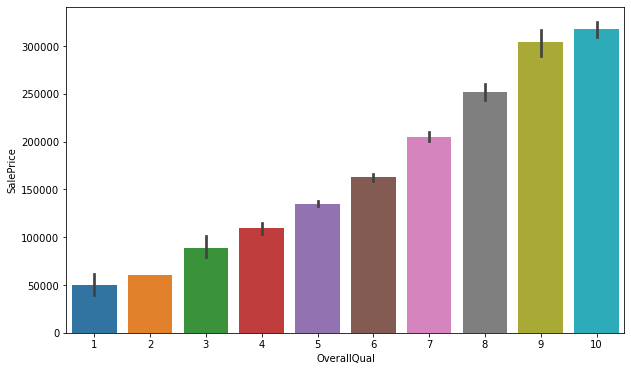

In [46]:
#scatter plot of quality

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=outhood7,
                x="OverallQual",
                y="SalePrice",
                ax=ax);

#also seems to have a positive correlation

In [47]:
# adding the overall quality score on the area model

outhood8=outhood.copy()

outhood8 = sm.add_constant(outhood8)
y8 = outhood8["SalePrice"]
X8 = outhood8[["const","OverallQual","GrLivArea","TotalBsmtSF","GarageArea"]]

reg8 = sm.OLS(y8, X8).fit()

reg8.summary()

#GOOD! strong model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1173.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:44:45   Log-Likelihood:                -13376.
No. Observations:                1160   AIC:                         2.676e+04
Df Residuals:                    1155   BIC:                         2.679e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -6.02e+04   3610.914    -16.671      0.000   -6.73e+04   -5.31e+04
OverallQual  1.902e+04    753.270     25.255      0.000    1.75e+04    2.05e+04
GrLivArea      40.9113      1.910     21.420      0.000      37.164      44.659
TotalBsmtSF    32.4363      2.225     14.579      0.000      28.071      36.801
GarageArea     51.6789      4.436     11.649      0.000      42.974      60.383
==============================================================================
Omnibus:                       31.737   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.754
Skew:                          -0.049   Prob(JB):                     2.62e-16
Kurtosis:                       4.214   Cond. No.                     9.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#finally, also wanted to check the number of rooms influence. looking at rooms and bathrooms above ground level

outhood9=outhood.copy()

outhood9 = sm.add_constant(outhood9)
y9 = outhood9["SalePrice"]
X9 = outhood9[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

reg9 = sm.OLS(y9, X9).fit()

reg9.summary()

#BEST MODEL SO FAR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     757.4
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:44:45   Log-Likelihood:                -13317.
No. Observations:                1160   AIC:                         2.665e+04
Df Residuals:                    1152   BIC:                         2.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.156e+04   4257.980    -12.109      0.000   -5.99e+04   -4.32e+04
TotRmsAbvGrd             -3790.3283    822.986     -4.606      0.000   -5405.047   -2175.610
total_bathrooms_above_gl  7413.7311   1348.460      5.498      0.000    4768.018    1.01e+04
OverallQual               1.837e+04    764.166     24.043      0.000    1.69e+04    1.99e+04
LotArea                      0.7280      0.083      8.781      0.000       0.565       0.891
GrLivArea                   41.4944      3.360     12.351      0.000      34.903      48.086
TotalBsmtSF                 32.0104      2.223     14.397      0.000      27.648      36.373
GarageArea                  46.1718      4.252     10.860      0.000      37.830      54.514
==============================================================================
Omnibus:                       24.273   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.760
Skew:                          -0.011   Prob(JB):                     2.58e-11
Kurtosis:                       4.004   Cond. No.                     8.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

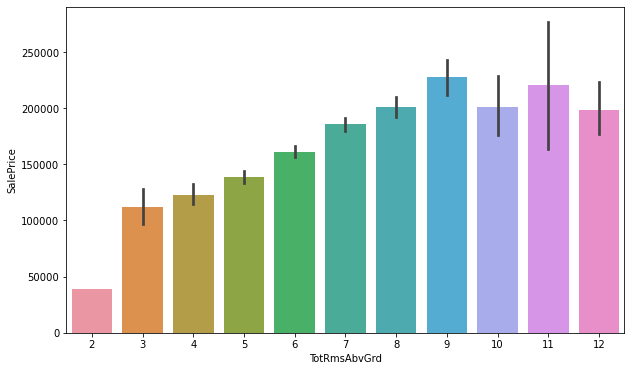

In [49]:
#check number rooms

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=outhood9,
                x="TotRmsAbvGrd",
                y="SalePrice",
                ax=ax);

#positive trend too

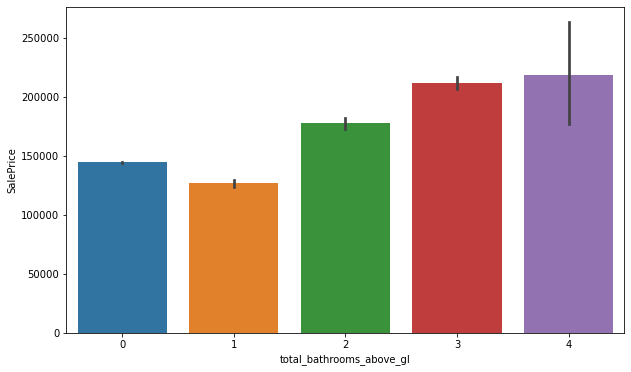

In [50]:
#bathroom number

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=outhood9,
                x="total_bathrooms_above_gl",
                y="SalePrice",
                ax=ax);

#some positive trend too

In [51]:
#FINAL MODEL WITHOUT SALES PRICE OUTLIERS BY NEIGHBORHOOD:

"""outhood9=outhood.copy()

outhood9 = sm.add_constant(outhood9)
y9 = outhood9["SalePrice"]
X9 = outhood9[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

reg9 = sm.OLS(y9, X9).fit()

reg9.summary()
"""

'outhood9=outhood.copy()\n\nouthood9 = sm.add_constant(outhood9)\ny9 = outhood9["SalePrice"]\nX9 = outhood9[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual","LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]\n\nreg9 = sm.OLS(y9, X9).fit()\n\nreg9.summary()\n'

In [52]:
#can it still be improved? let´s check the categorical data

#checking if hood can influece once again (by initial results it should indeed)

dfhood=outhood.copy()

dummyhood=pd.get_dummies(dfhood['Neighborhood'])
dfhood = dfhood.drop('Neighborhood',axis = 1)
dfhood = dfhood.join(dummyhood)
dfhood.columns

Index(['Id', 'LotArea', 'Street', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterCond', 'Foundation',
       'BsmtCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'time_sold_from_contruction', 'time_sold_from_renovation',
       'total_bathrooms_above_gl', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide',
       'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [53]:
dfhood1=dfhood.copy()

dfhood1 = sm.add_constant(dfhood1)
ydh = dfhood1["SalePrice"]
Xdh = dfhood1[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual",'Blmngtn', 'Blueste', 'BrDale', 'BrkSide','ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR','MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge','NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst','StoneBr', 'Timber', 'Veenker',"LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

regd = sm.OLS(ydh, Xdh).fit()

regd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     223.1
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:44:47   Log-Likelihood:                -13177.
No. Observations:                1160   AIC:                         2.642e+04
Df Residuals:                    1128   BIC:                         2.658e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.929e+04   4643.925     -4.155      0.000   -2.84e+04   -1.02e+04
TotRmsAbvGrd             -2769.9715    760.763     -3.641      0.000   -4262.641   -1277.302
total_bathrooms_above_gl  2687.8480   1468.136      1.831      0.067    -192.737    5568.433
OverallQual                1.48e+04    771.241     19.196      0.000    1.33e+04    1.63e+04
Blmngtn                  -3656.3357   6049.251     -0.604      0.546   -1.55e+04    8212.715
Blueste                  -2.115e+04   1.44e+04     -1.471      0.142   -4.94e+04    7068.964
BrDale                   -2.599e+04   6024.207     -4.314      0.000   -3.78e+04   -1.42e+04
BrkSide                  -7968.2140   3101.523     -2.569      0.010   -1.41e+04   -1882.810
ClearCr                   1.413e+04   4810.783      2.938      0.003    4694.837    2.36e+04
CollgCr                   6570.3607   2141.070      3.069      0.002    2369.433    1.08e+04
Crawfor                   1.931e+04   3413.597      5.657      0.000    1.26e+04     2.6e+04
Edwards                  -9963.5139   2583.749     -3.856      0.000    -1.5e+04   -4894.019
Gilbert                   3816.0661   2929.040      1.303      0.193   -1930.913    9563.045
IDOTRR                    -2.19e+04   4006.962     -5.465      0.000   -2.98e+04    -1.4e+04
MeadowV                  -1.552e+04   5283.129     -2.938      0.003   -2.59e+04   -5154.088
Mitchel                  -4807.9709   3320.024     -1.448      0.148   -1.13e+04    1706.147
NAmes                    -6931.8339   1861.146     -3.724      0.000   -1.06e+04   -3280.137
NPkVill                  -1.666e+04   7336.215     -2.270      0.023    -3.1e+04   -2261.230
NWAmes                   -3007.0694   2812.497     -1.069      0.285   -8525.383    2511.244
NoRidge                   2.736e+04   4586.781      5.964      0.000    1.84e+04    3.64e+04
NridgHt                   2.413e+04   3915.200      6.162      0.000    1.64e+04    3.18e+04
OldTown                  -2.538e+04   2483.325    -10.220      0.000   -3.03e+04   -2.05e+04
SWISU                    -2.199e+04   4562.987     -4.819      0.000   -3.09e+04    -1.3e+04
Sawyer                   -4837.2735   2757.848     -1.754      0.080   -1.02e+04     573.815
SawyerW                   3275.3050   3056.323      1.072      0.284   -2721.412    9272.022
Somerst                    1.15e+04   3365.718      3.415      0.001    4891.825    1.81e+04
StoneBr                   1.805e+04   5706.172      3.163      0.002    6854.815    2.92e+04
Timber                    1.089e+04   4361.270      2.497      0.013    2333.582    1.94e+04
Veenker                   3.143e+04   6516.227      4.823      0.000    1.86e+04    4.42e+04
LotArea                      0.5176      0.083      6.205      0.000       0.354       0.681
GrLivArea     

In [54]:
#CATEGORICAL DATA IMPROVED THE R ONCE AGAIN: BEST REGRESSION SO FAR

In [55]:
# does it make sense to add the year data? let´s check

dfhood2=dfhood.copy()

dfhood2 = sm.add_constant(dfhood2)
ydh2 = dfhood2["SalePrice"]
Xdh2 = dfhood2[["const","time_sold_from_contruction","time_sold_from_renovation","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual",'Blmngtn', 'Blueste', 'BrDale', 'BrkSide','ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR','MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge','NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst','StoneBr', 'Timber', 'Veenker',"LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

regd2 = sm.OLS(ydh2, Xdh2).fit()

regd2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     239.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:44:47   Log-Likelihood:                -13109.
No. Observations:                1160   AIC:                         2.629e+04
Df Residuals:                    1126   BIC:                         2.646e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.253e+04   5227.221      2.397      0.017    2272.690    2.28e+04
time_sold_from_contruction  -278.9727     45.672     -6.108      0.000    -368.585    -189.361
time_sold_from_renovation   -328.8263     37.336     -8.807      0.000    -402.082    -255.570
TotRmsAbvGrd               -2194.5505    720.771     -3.045      0.002   -3608.755    -780.346
total_bathrooms_above_gl    -589.9719   1431.362     -0.412      0.680   -3398.408    2218.464
OverallQual                 1.249e+04    754.181     16.567      0.000     1.1e+04     1.4e+04
Blmngtn                    -1.476e+04   5816.594     -2.537      0.011   -2.62e+04   -3346.265
Blueste                    -1.812e+04   1.36e+04     -1.334      0.183   -4.48e+04    8533.409
BrDale                     -2.143e+04   5702.963     -3.758      0.000   -3.26e+04   -1.02e+04
BrkSide                     4817.0210   3309.044      1.456      0.146   -1675.565    1.13e+04
ClearCr                     1.352e+04   4542.749      2.977      0.003    4611.645    2.24e+04
CollgCr                    -1294.1051   2179.247     -0.594      0.553   -5569.946    2981.736
Crawfor                     3.026e+04   3483.737      8.687      0.000    2.34e+04    3.71e+04
Edwards                    -4594.4389   2507.999     -1.832      0.067   -9515.317     326.439
Gilbert                    -3960.0563   2902.619     -1.364      0.173   -9655.206    1735.094
IDOTRR                     -7565.4463   4136.960     -1.829      0.068   -1.57e+04     551.571
MeadowV                    -1.582e+04   4992.521     -3.168      0.002   -2.56e+04   -6022.542
Mitchel                    -6882.3565   3149.022     -2.186      0.029   -1.31e+04    -703.746
NAmes                       -930.1070   1833.966     -0.507      0.612   -4528.483    2668.269
NPkVill                    -1.039e+04   6947.698     -1.495      0.135    -2.4e+04    3243.841
NWAmes                      -739.8899   2666.730     -0.277      0.781   -5972.209    4492.429
NoRidge                     2.222e+04   4390.809      5.061      0.000    1.36e+04    3.08e+04
NridgHt                     1.532e+04   3804.592      4.028      0.000    7859.275    2.28e+04
OldTown                     -1.19e+04   3029.799     -3.928      0.000   -1.78e+04   -5955.946
SWISU                      -6481.1962   4647.852     -1.394      0.163   -1.56e+04    2638.228
Sawyer                     -2980.0481   2616.298     -1.139      0.255   -8113.415    2153.319
SawyerW                     -468.7471   2933.462     -0.160      0.873   -6224.413    5286.919
Somerst                     3085.0428   3292.866      0.937      0.349   -3375.800    9545.886
StoneBr                     1.571e+04   5406.590      2.906      0.004    5104.749    2.63e+04
Timber                      6232.2645   416

In [56]:
#YES! Final regression above with area, year, nr rooms and neighborhood influencing the price

In [57]:
#predictions - needs change

dfhood2 = dfhood2.assign(SalePrice_hat=regd2.predict(dfhood2[["const","time_sold_from_contruction","time_sold_from_renovation","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual",'Blmngtn', 'Blueste', 'BrDale', 'BrkSide','ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR','MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge','NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst','StoneBr', 'Timber', 'Veenker',"LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]))

dfhood2.head()

,const,Id,LotArea,Street,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice_hat
0,1.0,1,8450,Pave,2Story,7,5,2003,2003,Gable,...,0,0,0,0,0,0,0,0,0,203071.127979
1,1.0,2,9600,Pave,1Story,6,8,1976,1976,Gable,...,0,0,0,0,0,0,0,0,1,196403.919442
2,1.0,3,11250,Pave,2Story,7,5,2001,2002,Gable,...,0,0,0,0,0,0,0,0,0,215497.712321
4,1.0,5,14260,Pave,2Story,8,5,2000,2000,Gable,...,0,0,0,0,0,0,0,0,0,278800.055246
5,1.0,6,14115,Pave,1.5Fin,5,5,1993,1995,Gable,...,0,0,0,0,0,0,0,0,0,156510.578290


In [58]:
#check comparasion of sales price and predicted sales price

comparasion=dfhood2[['SalePrice','SalePrice_hat']]

comparasion

,SalePrice,SalePrice_hat
0,208500,203071.127979
1,181500,196403.919442
2,223500,215497.712321
4,250000,278800.055246
5,143000,156510.578290
...,...,...
1455,175000,184573.189690
1456,210000,215916.684076
1457,266500,243389.834794
1458,142125,132966.055927


In [59]:
#prediction and actual value are close to each other. more categorial data should be analysed for even more accurate result

In [60]:
## **Analysis 2**: expensive cluster - a short intro, not the focus of this analysis

In [61]:
exphood=house.copy()

exphood.drop(exphood[exphood['SalePrice'] <= 326223.868726].index, inplace=True)

#outhood.corr()['SalePrice']

#first the no outliers analysis

exphood.head()

,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation,total_bathrooms_above_gl
11,12,11924,Pave,NridgHt,2Story,9,5,2005,2006,Hip,...,736,0,0,7,2006,Partial,345000,1,0,3
53,54,50271,Pave,Veenker,1Story,9,5,1981,1987,Gable,...,894,0,0,11,2006,Normal,385000,25,19,1
58,59,13682,Pave,StoneBr,2Story,10,5,2006,2006,Hip,...,641,0,0,10,2006,Partial,438780,0,0,4
112,113,9965,Pave,CollgCr,2Story,7,5,2007,2007,Gable,...,792,0,0,10,2007,Partial,383970,0,0,3
151,152,13891,Pave,NridgHt,1Story,8,5,2007,2008,Hip,...,866,0,0,1,2008,Partial,372402,1,0,2


In [62]:
exphood.corr()['SalePrice']

Id                            0.067152
LotArea                       0.054058
OverallQual                   0.468864
OverallCond                   0.003238
YearBuilt                     0.037536
YearRemodAdd                  0.024771
TotalBsmtSF                   0.483403
1stFlrSF                      0.479602
2ndFlrSF                      0.271275
GrLivArea                     0.625936
BedroomAbvGr                  0.102339
KitchenAbvGr                       NaN
TotRmsAbvGrd                  0.452590
Fireplaces                    0.212519
GarageYrBlt                   0.121131
GarageArea                    0.172922
PoolArea                      0.447897
MiscVal                            NaN
MoSold                       -0.218931
YrSold                       -0.086034
SalePrice                     1.000000
time_sold_from_contruction   -0.043824
time_sold_from_renovation    -0.041151
total_bathrooms_above_gl      0.419263
Name: SalePrice, dtype: float64

In [63]:
exphood1=exphood.copy()
exphood1=exphood1.assign(const=1)
exphood1.head()


,Id,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,time_sold_from_contruction,time_sold_from_renovation,total_bathrooms_above_gl,const
11,12,11924,Pave,NridgHt,2Story,9,5,2005,2006,Hip,...,0,0,7,2006,Partial,345000,1,0,3,1
53,54,50271,Pave,Veenker,1Story,9,5,1981,1987,Gable,...,0,0,11,2006,Normal,385000,25,19,1,1
58,59,13682,Pave,StoneBr,2Story,10,5,2006,2006,Hip,...,0,0,10,2006,Partial,438780,0,0,4,1
112,113,9965,Pave,CollgCr,2Story,7,5,2007,2007,Gable,...,0,0,10,2007,Partial,383970,0,0,3,1
151,152,13891,Pave,NridgHt,1Story,8,5,2007,2008,Hip,...,0,0,1,2008,Partial,372402,1,0,2,1


In [64]:
#first question. does the same model apply to it?

dummyexp=pd.get_dummies(exphood1["Neighborhood"])
exphood1=exphood1.drop('Neighborhood', axis = 1)
exphood1=exphood1.join(dummyexp)

y1a = exphood1["SalePrice"]
X1a = exphood1[["const","TotRmsAbvGrd","total_bathrooms_above_gl","OverallQual",'ClearCr', 'CollgCr', 'Crawfor','Gilbert', 'NAmes', 'NoRidge', 'NridgHt', 'OldTown', 'Somerst','StoneBr', 'Timber', 'Veenker',"LotArea","GrLivArea","TotalBsmtSF","GarageArea"]]

expreg1 = sm.OLS(y1a, X1a).fit()

expreg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     7.851
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           1.66e-09
Time:                        16:44:48   Log-Likelihood:                -887.65
No. Observations:                  73   AIC:                             1813.
Df Residuals:                      54   BIC:                             1857.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.907e+05   8.39e+04     -2.272      0.027   -3.59e+05   -2.24e+04
TotRmsAbvGrd                -1.4016   7014.591     -0.000      1.000   -1.41e+04    1.41e+04
total_bathrooms_above_gl  1.854e+04   1.89e+04      0.983      0.330   -1.93e+04    5.64e+04
OverallQual               1.803e+04   1.05e+04      1.725      0.090   -2930.308     3.9e+04
ClearCr                  -3019.0962    5.3e+04     -0.057      0.955   -1.09e+05    1.03e+05
CollgCr                  -7567.2531   4.01e+04     -0.189      0.851   -8.79e+04    7.28e+04
Crawfor                   -734.5591   2.78e+04     -0.026      0.979   -5.66e+04    5.51e+04
Gilbert                   1.549e+04   5.32e+04      0.291      0.772   -9.11e+04    1.22e+05
NAmes                    -9.791e+04   5.21e+04     -1.878      0.066   -2.02e+05    6592.097
NoRidge                  -4.165e+04   2.16e+04     -1.931      0.059   -8.49e+04    1588.007
NridgHt                  -1.597e+04    2.3e+04     -0.694      0.491   -6.21e+04    3.02e+04
OldTown                  -2.499e+04   6.12e+04     -0.409      0.684   -1.48e+05    9.77e+04
Somerst                  -1.002e+04   2.69e+04     -0.372      0.711   -6.39e+04    4.39e+04
StoneBr                   1.383e+04   2.45e+04      0.566      0.574   -3.52e+04    6.29e+04
Timber                   -2.531e+04   3.15e+04     -0.804      0.425   -8.84e+04    3.78e+04
Veenker                   7179.8383   5.76e+04      0.125      0.901   -1.08e+05    1.23e+05
LotArea                      0.2423      0.309      0.785      0.436      -0.376       0.861
GrLivArea                   80.9592     25.690      3.151      0.003      29.454     132.465
TotalBsmtSF                 89.1644     18.644      4.782      0.000      51.785     126.544
GarageArea                  69.4959     44.057      1.577      0.121     -18.833     157.825
==============================================================================
Omnibus:                        5.846   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.335
Skew:                           0.363   Prob(JB):                       0.0421
Kurtosis:                       4.247   Cond. No.                     1.40e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
#model is acceptable for expensive houses too but it is not as much of a good fit - needs improvement, some variables are not so important on this cluster

In [66]:
#Analysis 3 for cheap cluster also needed for complet model